<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-04-07 05:26:58--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.3’

m4_survey_data.sqli 100%[===================>]  34.98M  44.0MB/s    in 0.8s    

2024-04-07 05:27:00 (44.0 MB/s) - ‘m4_survey_data.sqlite.3’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

In [4]:
import seaborn as sns
print(sns.__version__)

0.12.2


In [5]:
import matplotlib.pyplot as plt

In [6]:
pip install --upgrade seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 24.6 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.9.0
    Uninstalling seaborn-0.9.0:
      Successfully uninstalled seaborn-0.9.0
Note: you may need to restart the kernel to use updated packages.


## Demo: How to run an sql query


In [7]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [8]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [9]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
limit 5
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78


## Demo: How to describe a table


In [10]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


<AxesSubplot:ylabel='Count'>

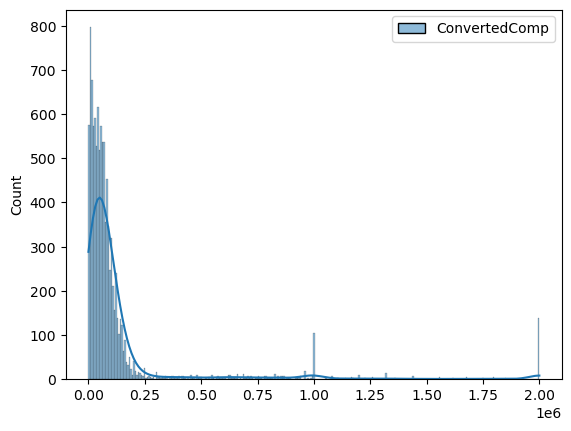

In [6]:
# your code goes here
# If it show errors, restart the kernal to use the updated version of seaborn
QUERY = """
SELECT ConvertedComp
FROM master
"""
ccp = pd.read_sql_query(QUERY,conn)
sns.histplot(data =ccp, kde=True)

### Box Plots


Plot a box plot of `Age.`


<AxesSubplot:>

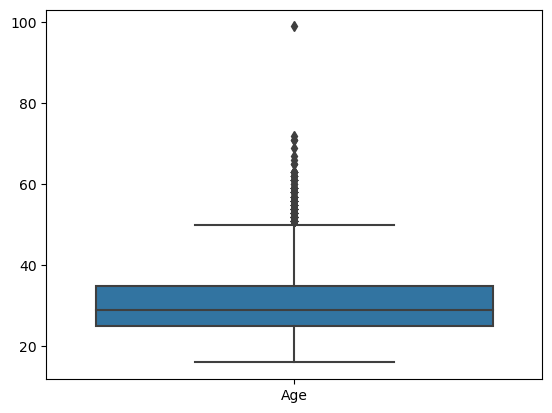

In [7]:
# your code goes here

Query = """
Select Age from Master


"""

age = pd.read_sql_query(Query, conn)
sns.boxplot(age)


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

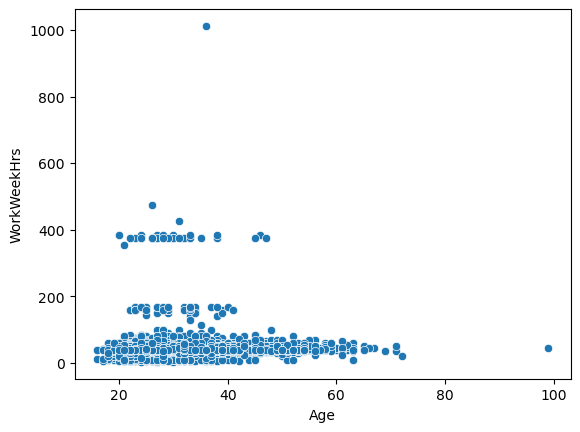

In [8]:
# your code goes here

Query = """
Select Age, WorkWeekHrs from master
"""

data = pd.read_sql_query(Query, conn)
data
sns.scatterplot(data=data, x='Age', y='WorkWeekHrs')

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


<AxesSubplot:xlabel='CodeRevHrs', ylabel='WorkWeekHrs'>

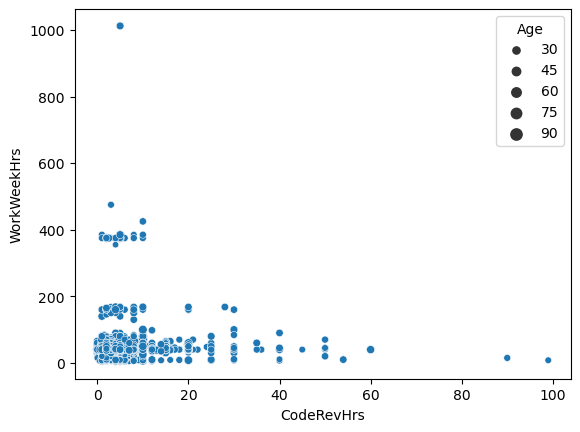

In [9]:
# your code goes here

Query = """
Select Age, WorkWeekHrs, CodeRevHrs from master
"""

data = pd.read_sql_query(Query, conn)
data
sns.scatterplot(data=data, x='CodeRevHrs', y='WorkWeekHrs', size='Age')

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [10]:
# your code goes here

Query = """
Select DatabaseDesireNextYear, count(*) from DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by count(*) desc
limit 5
"""

data = pd.read_sql_query(Query, conn)
data.head()

,DatabaseDesireNextYear,count(*)
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856


Text(0.5, 1.0, 'top 5 databases that respondents wish to learn next year')

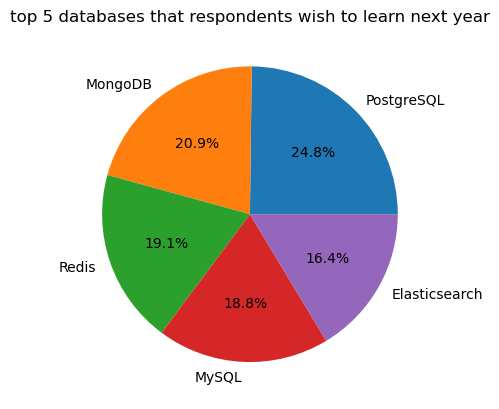

In [11]:
plt.pie(data['count(*)'], labels=data['DatabaseDesireNextYear'], autopct='%1.1f%%');

plt.title("top 5 databases that respondents wish to learn next year")

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [12]:
# your code goes here

Query = """
SELECT age, WorkWeekHrs, CodeRevHrs
FROM master
WHERE age >= 30 and age<=35
GROUP BY age
"""

data = pd.read_sql_query(Query, conn)
data

,Age,WorkWeekHrs,CodeRevHrs
0,30.0,40.0,5.0
1,31.0,8.0,3.0
2,32.0,40.0,2.0
3,33.0,40.0,2.0
4,34.0,40.0,2.0
5,35.0,38.0,2.0


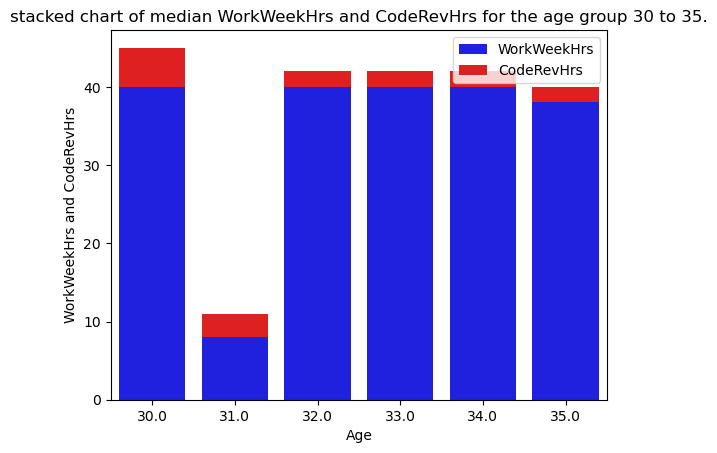

In [13]:
sns.barplot(data=data, x='Age', y='WorkWeekHrs',color='blue', label = 'WorkWeekHrs')
sns.barplot(data=data, x='Age', y='CodeRevHrs', color='red',label = 'CodeRevHrs', bottom=data['WorkWeekHrs'])

plt.title("stacked chart of median WorkWeekHrs and CodeRevHrs for the age group 30 to 35.")
plt.ylabel('WorkWeekHrs and CodeRevHrs')
plt.legend()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


<AxesSubplot:xlabel='Age'>

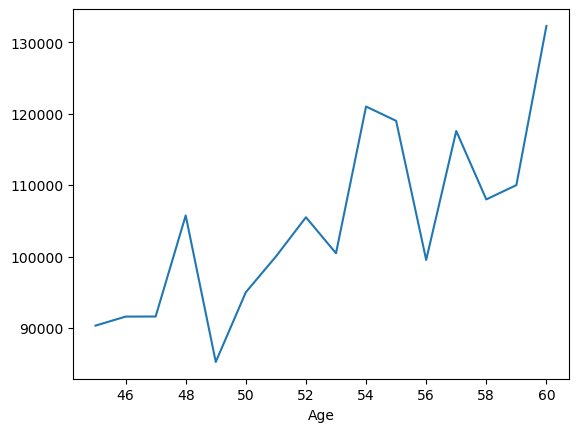

In [37]:
# your code goes here

query = """
SELECT Age, ConvertedComp
FROM master
WHERE Age >= 45 AND Age <= 60
"""

# Execute SQL query and retrieve data
data = pd.read_sql_query(query, conn)
data = data.dropna()
conmed = data.groupby('Age')['ConvertedComp'].median()
type(conmed)   # series
sns.lineplot(data=conmed, x=conmed.index, y=conmed.values)

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [39]:
# your code goes here

query = """
select MainBranch from master"""

data = pd.read_sql_query(query, conn)
size = data.groupby('MainBranch').agg({'MainBranch':'size'})
s


sns.barplot(data['MainBranch'])

ValueError: could not convert string to float: 'I am a developer by profession'

Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
